In [2]:
import numpy as np 
import networkx as nx  
import matplotlib.pyplot as plt
from graph import GraphColoring
from vqe import GraphColorVQE
from grover import GraphColorGrover

## Ising Hamiltonian Variational Quantum Eigensolver

 The goal is to come up with a hamiltonian that encodes the problem cost as such:
 
 $$ 
    C(\boldsymbol\theta) = \langle\psi(\boldsymbol\theta)~|H|~\psi(\boldsymbol\theta)\rangle 
 $$
                       

Ising formulation provides us with a simple way of translating the problem into a hamiltonian


$$ C(\boldsymbol\theta) = \langle\psi(\boldsymbol\theta)~|H|~\psi(\boldsymbol\theta)\rangle = \sum_i w_i \langle\psi(\boldsymbol\theta)~|Z_i|~\psi(\boldsymbol\theta)\rangle + \sum_{i,j} w_{ij} \langle\psi(\boldsymbol\theta)~|Z_iZ_j|~\psi(\boldsymbol\theta)\rangle
        $$

Translate constraints into a set of penalties. For example:

$$ X_{00} \oplus X_{01} \rightarrow P(X_{00} + X_{01} - 1)^2 $$
$$ \lnot (X_{00} \land X_{10}) \rightarrow P(X_{00}*X_{01})$$

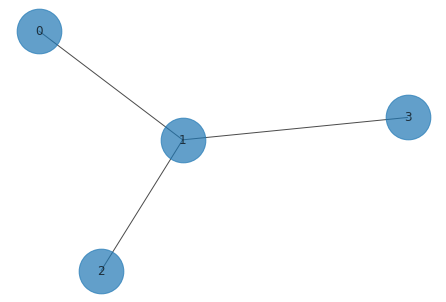

array([[-10.,  10.,   5.,   0.,   0.,   0.,   0.,   0.],
       [ 10., -10.,   0.,   5.,   0.,   0.,   0.,   0.],
       [  5.,   0., -10.,  10.,   5.,   0.,   5.,   0.],
       [  0.,   5.,  10., -10.,   0.,   5.,   0.,   5.],
       [  0.,   0.,   5.,   0., -10.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   5.,  10., -10.,   0.,   0.],
       [  0.,   0.,   5.,   0.,   0.,   0., -10.,  10.],
       [  0.,   0.,   0.,   5.,   0.,   0.,  10., -10.]])

In [3]:
edges = [[1,0],[1,2],[1,3]]
g = GraphColoring(ncolors=2, edges=edges, nnodes=4) 
g.render_graph()

vqeGC = GraphColorVQE(g) 
vqeGC.generate_ising_hamiltonian(vqeGC.graphcover, 10,2)

## Ising Hamiltonian using Exact Eigensolver

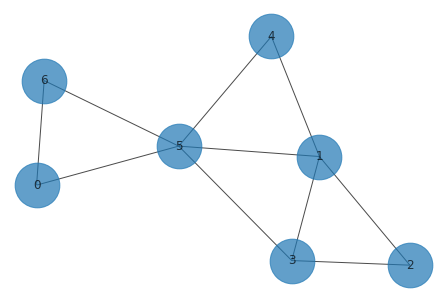

Operator with number of qubits: 21
Graph coloring satisfied!


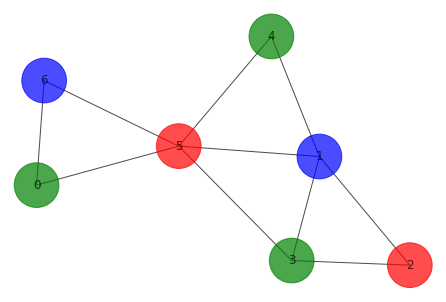

In [2]:
edges = [[2, 1], [3, 1], [4, 1], [5, 0], [5, 3], [6, 0], [6, 5], [1,5], [4,5], [2,3]]
g = GraphColoring(ncolors=3, edges=edges, nnodes=7)
g.render_graph()

vqeGC = GraphColorVQE(g) 
solution = vqeGC.run_exact()

g.render_graph(solution)

## Ising Hamiltonian using Variational Quantum Eigensolver on simulator

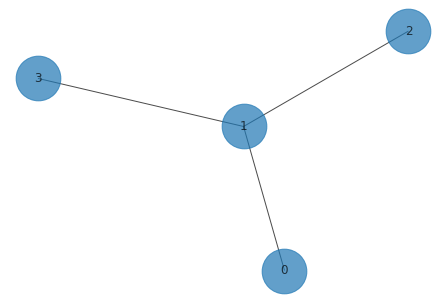

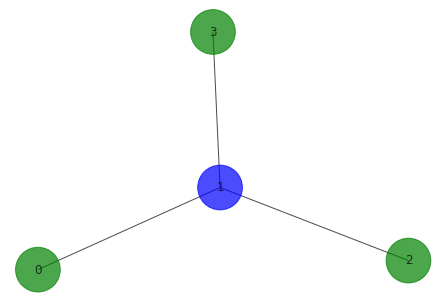

In [20]:
edges = [[1,0],[1,2],[1,3]]
g = GraphColoring(ncolors=2, edges=edges, nnodes=4) 
g.render_graph()

vqeGC = GraphColorVQE(g,niter=80) 
solution = vqeGC.run_sim()

g.render_graph(solution)